In [ ]:
pip install auto-sklearn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from pprint import pprint

# **Regression Task using Flights dataset from Seaborn**

In [ ]:
#loading the dataset
df = sns.load_dataset('flights')
df.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [ ]:
X=df.drop(["passengers"],axis=1)
y=df["passengers"]
X.shape, y.shape

((144, 2), (144,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape,y_train.shape, y_test.shape

((115, 2), (29, 2), (115,), (29,))

In [ ]:
import autosklearn.regression
automl = autosklearn.regression.AutoSklearnRegressor(
time_left_for_this_task=5*60,per_run_time_limit=5,tmp_folder='/temp/autosklearn_regression_example_tmp')
automl.fit(X_train, y_train)

AutoSklearnRegressor(per_run_time_limit=5, time_left_for_this_task=300,
                     tmp_folder='/temp/autosklearn_regression_example_tmp')

In [ ]:
from sklearn.metrics import mean_absolute_error
from autosklearn.metrics import mean_absolute_error as auto_mean_absolute_error

In [ ]:
# evaluate best model
y_pred = automl.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print("MAE: %.3f" % mae)

MAE: 8.209


In [ ]:
# summarize
print(automl.sprint_statistics())

auto-sklearn results:
  Dataset name: f4a09178-81e5-11ec-8619-0242ac1c0002
  Metric: r2
  Best validation score: 0.985839
  Number of target algorithm runs: 67
  Number of successful target algorithm runs: 64
  Number of crashed target algorithm runs: 1
  Number of target algorithms that exceeded the time limit: 2
  Number of target algorithms that exceeded the memory limit: 0



In [ ]:
print(automl.leaderboard())

          rank  ensemble_weight                 type      cost  duration
model_id                                                                
59           1             0.02                  sgd  0.014161  0.904068
55           2             0.18       ard_regression  0.016389  2.268613
66           3             0.26                  sgd  0.019145  0.937000
10           4             0.26    gradient_boosting  0.020615  2.898442
54           5             0.22       ard_regression  0.023386  1.356912
37           6             0.06  k_nearest_neighbors  0.157941  0.868833


In [ ]:
pprint(automl.show_models(), indent=4)

{   10: {   'cost': 0.0206147776399358,
            'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice object at 0x7fdd69940cd0>,
            'ensemble_weight': 0.26,
            'feature_preprocessor': <autosklearn.pipeline.components.feature_preprocessing.FeaturePreprocessorChoice object at 0x7fdd695a5990>,
            'model_id': 10,
            'rank': 4,
            'regressor': <autosklearn.pipeline.components.regression.RegressorChoice object at 0x7fdd69908f90>,
            'sklearn_regressor': HistGradientBoostingRegressor(l2_regularization=0.0018018055158809108,
                              learning_rate=0.05048450688348591, max_iter=512,
                              max_leaf_nodes=3, min_samples_leaf=1,
                              n_iter_no_change=19, random_state=1,
                              validation_fraction=0.19819612428903174,
                              warm_start=True)},
    37: {   'cost': 0.15794050940051485,
  

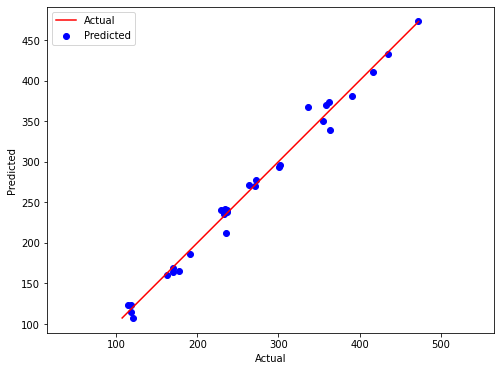

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, c='blue')

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'r-')
plt.xlabel('Actual', fontsize=10)
plt.ylabel('Predicted', fontsize=10)
plt.legend(['Actual', 'Predicted'])
plt.axis('equal')
plt.show()

In [ ]:
import pickle
# save the model 
filename = 'final_model.sav' 
pickle.dump(automl, open(filename, 'wb'))

In [ ]:
#load the model
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.9880674188476266
